In [34]:
%config Completer.use_jedi = False
import sys
import warnings
warnings.filterwarnings('ignore')

import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

import numpy as np
import matplotlib.pyplot as plt
from scipy import special

In [432]:
def p_est(s, n, sigma):
    return ((2**n)/((n+1)*sigma))*np.exp(-s**2/(2*n*sigma**2))

def p_2(s, sigma):
    sigma_2 = sigma**2
    return 2*np.sqrt(1/(np.pi*sigma_2))*np.exp(-s**2/(4*sigma_2))*(special.erf(s/(2*sigma)))


In [421]:
n = 2
sample_size = 100000000
sigma = .01
xs = np.random.normal(0, sigma, (n, sample_size))
x_abs = np.abs(xs)
s_abs = np.sum(x_abs, axis=0)

In [459]:
np.sum(vs)

19999.973474093327

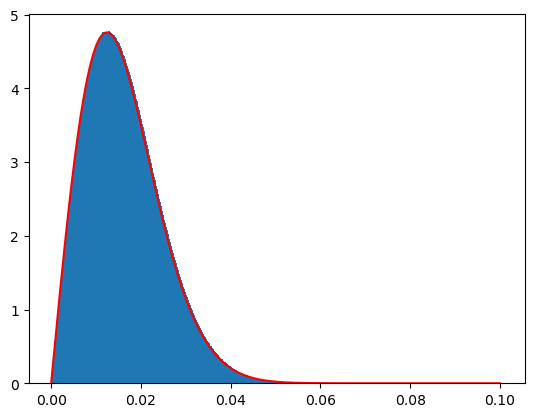

In [460]:
#bins=np.linspace(0,1, 100)
bins_num=2000
hist, bins= np.histogram(s_abs, bins=bins_num,  range=[0, .1])
hist = hist/np.sum(hist)
plt.bar(bins[:-1], bins_num*hist, width=1/bins_num, align='edge')
#vals, bins, _ = plt.hist(s_abs, bins=bins_num, density=True)
vs = p_2(bins, sigma)
vs = vs/np.sum(vs)
plt.plot(bins, bins_num*vs, 'r')
#plt.scatter(bins, vs)

In [434]:
from scipy.integrate import quad

def Pr(s_end, sigma):
    def func(s):
        return p_2(s, sigma)
    return quad(func,0, s_end)[0]

def Pr_est(s_end, sigma):
    return special.erf(s_end/(2*sigma))**2

def Pr_3(s, sigma):
    return special.erf(s/(2*sigma))**6

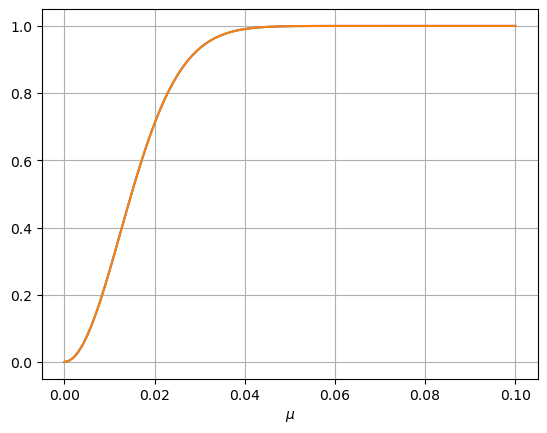

In [446]:
mus = np.linspace(0,.1, 100)

plt.plot(mus, [Pr(mu, sigma) for mu in mus])
plt.plot(mus, Pr_est(mus, sigma))
plt.xlabel(r"$\mu$")
plt.grid(); plt.show()

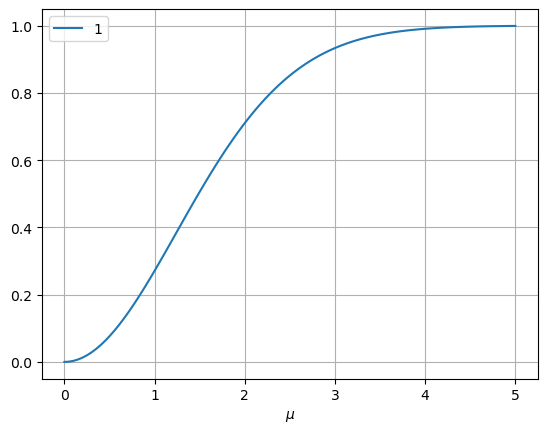

In [288]:
mus = np.linspace(0,5, 100)

for sig in [1]:
    plt.plot(mus, Pr_est(mus, sig), label=f"{sig}")
plt.xlabel(r"$\mu$")
plt.grid();plt.legend();#plt.yscale('log')

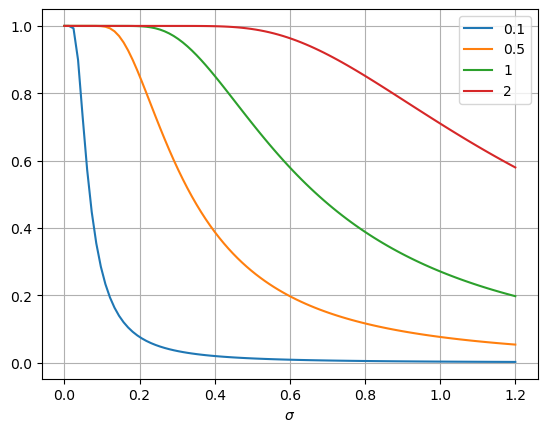

In [289]:
sigs = np.linspace(0,1.2, 100)

for mu in [.1, .5, 1, 2]:
    plt.plot(sigs, Pr_est(mu, sigs), label=f"{mu}")
plt.xlabel(r"$\sigma$")    
plt.grid();plt.legend();#plt.yscale('log')

In [283]:
Mus, Sigs = np.meshgrid(mus, sigs, indexing='ij')

probs = np.zeros_like(Mus)
for i in range(Mus.shape[0]):
    for j in range(Mus.shape[1]):
        probs[i,j] = Pr_est(Mus[i,j], Sigs[i,j])

Text(0, 0.5, '$\\sigma$')

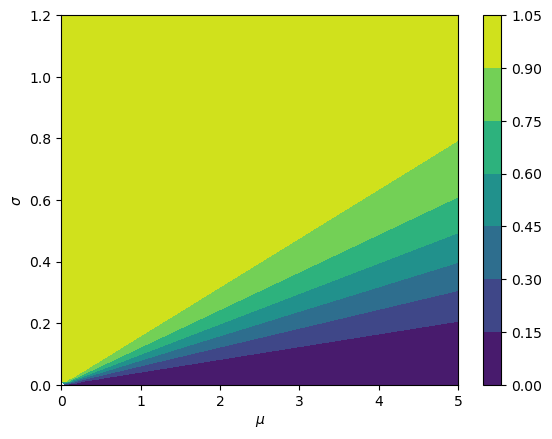

In [286]:
plt.contourf(mus, sigs, probs)
plt.colorbar()
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\sigma$")

In [505]:
def p_3(s, sigma):
    sigma_2 = sigma**2
    return ((3/np.sqrt(2*np.pi*sigma_2))
            *np.exp(-s**2/(6.5*sigma_2))
            *(special.erf(s/(np.sqrt(6.5)*sigma))**2)
           )

def Pr3_est(s_end, sigma):
    return special.erf(s_end/(np.sqrt(6.5)*sigma))**3


def p_32(s, sigma):
    sigma_2 = sigma**2
    return (1*np.sqrt(1/(np.pi*sigma_2))
            *np.exp(-s**2/(1*4*sigma_2))
             *np.exp((2*s/(np.sqrt(3)*2*sigma))-3)
            *(special.erf(s/(2*sigma))**2
                                    ))


In [489]:
n = 3
sample_size3 = 1000000000
sigma = .01
xs3 = np.random.normal(0, sigma, (n, sample_size3))
x_abs3 = np.abs(xs3)
s_abs3 = np.sum(x_abs3, axis=0)

In [490]:
#bins=np.linspace(0,1, 100)
bins_num=2000
hist3, bins3= np.histogram(s_abs3, bins=bins_num,  range=[0, .1])


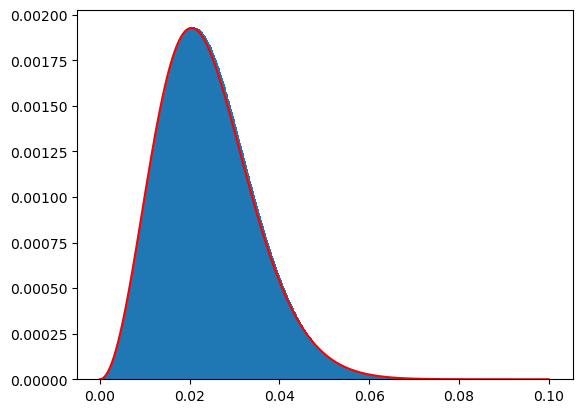

In [506]:
plt.bar(bins3[:-1], hist3/sample_size3, width=1/bins_num, align='edge')
#vals, bins, _ = plt.hist(s_abs, bins=bins_num, density=True)
vs3 = p_3(bins3, sigma)
vs3 = vs3/np.sum(vs3)
plt.plot(bins3, vs3, 'r')
#plt.scatter(bins, vs)

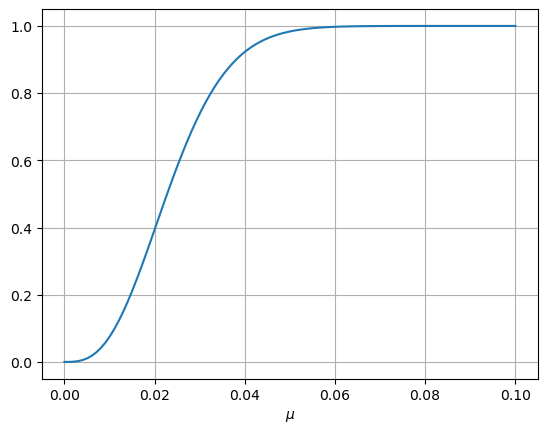

In [507]:
mus = np.linspace(0,.1, 100)

plt.plot(mus, Pr3_est(mus, sigma))
plt.xlabel(r"$\mu$")
plt.grid(); plt.show()

In [500]:
print(f"{Pr3_est(.2, sigma):.30f}")

1.000000000000000000000000000000


In [525]:
def p_4(s, sigma,c=9.5):
    sigma_2 = sigma**2
    return ((4/np.sqrt(2*np.pi*sigma_2))
            *np.exp(-s**2/(c*sigma_2))
            *(special.erf(s/(np.sqrt(c)*sigma))**3)
           )

def Pr4_est(s_end, sigma):
    return special.erf(s_end/(np.sqrt(9.5)*sigma))**4


In [ ]:
n = 4
sample_size4 = 1000000000
sigma = .01
xs4 = np.random.normal(0, sigma, (n, sample_size4))
x_abs4 = np.abs(xs4)
s_abs4 = np.sum(x_abs4, axis=0)

In [510]:
bins_num=2000
hist4, bins4= np.histogram(s_abs4, bins=bins_num,  range=[0, .1])


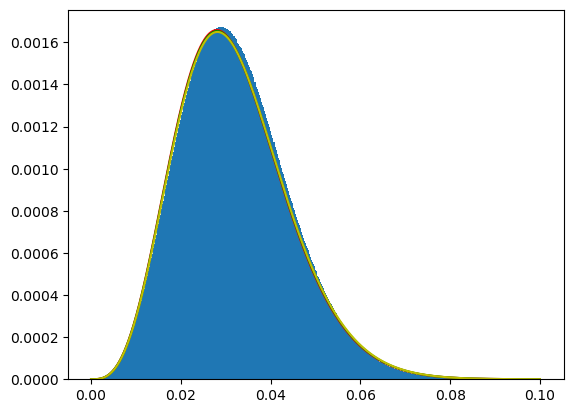

In [529]:
plt.bar(bins4[:-1], hist4/sample_size4, width=1/bins_num, align='edge')

vs4 = p_4(bins4, sigma, 9.4)
vs4 = vs4/np.sum(vs4)
plt.plot(bins4, vs4, 'r')

vs4 = p_4(bins4, sigma, 9.45)
vs4 = vs4/np.sum(vs4)
plt.plot(bins4, vs4, 'g')

vs4 = p_4(bins4, sigma, 9.5)
vs4 = vs4/np.sum(vs4)
plt.plot(bins4, vs4, 'y')
